In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [66]:
df = pd.read_csv("./jw-combined-graph/live-birth.csv", thousands=",") #header=None, 
births_df = df.T
births_df.columns = births_df.iloc[0]
births_df = births_df[1:]
births_df["Quarter"] = births_df.index
births_df = births_df.iloc[::-1]
# no_of_rows = len(births_df.index)
# print(no_of_rows)
# only plot half of the data so i can see better
# births_df = births_df.iloc[0:int(no_of_rows)]
births_df.tail()

Data Series,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
2020 2Q,9543,1,4499,3320,1186,359,101,78,2020 2Q
2020 3Q,9836,1,4762,3330,1174,381,116,73,2020 3Q
2020 4Q,9808,0,4722,3451,1133,323,117,62,2020 4Q
2021 1Q,8894,0,4097,3220,1093,326,98,60,2021 1Q
2021 2Q,9411,1,4298,3459,1140,339,112,63,2021 2Q


In [67]:
births_df[['year','quarter']] = births_df.Quarter.str.split(' ', expand=True)
births_df['quarter'] = births_df.quarter.str.replace('Q','')
births_df

Data Series,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter,year,quarter
1986 1Q,9954,0,4414,3553,1433,316,103,61,1986 1Q,1986,1
1986 2Q,9353,0,4186,3367,1271,332,87,50,1986 2Q,1986,2
1986 3Q,9854,1,4398,3475,1395,359,98,44,1986 3Q,1986,3
1986 4Q,10239,1,4782,3423,1454,351,98,51,1986 4Q,1986,4
1987 1Q,8834,0,4007,3053,1234,320,81,56,1987 1Q,1987,1
...,...,...,...,...,...,...,...,...,...,...,...
2020 2Q,9543,1,4499,3320,1186,359,101,78,2020 2Q,2020,2
2020 3Q,9836,1,4762,3330,1174,381,116,73,2020 3Q,2020,3
2020 4Q,9808,0,4722,3451,1133,323,117,62,2020 4Q,2020,4
2021 1Q,8894,0,4097,3220,1093,326,98,60,2021 1Q,2021,1


In [68]:
lc_across_industry = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
sector_names = lc_across_industry[sector].unique()
lc_across_industry.tail()

,quarter,level_1,level_2,level_3,value
1733,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,101.3
1734,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Information & Communications,111.7
1735,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Finance & Insurance,101.7
1736,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Business Services,104.4
1737,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Other Services Industries,98.2


In [69]:
lc_overall = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
sector_names = combined_lc[sector].unique()
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1980-Q1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9
1,1980-Q2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8
2,1980-Q3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8
3,1980-Q4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0
4,1981-Q1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2018-Q4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
156,2019-Q1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1
157,2019-Q2,101.3,104.4,106.7,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6
158,2019-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.1,NaN,NaN,NaN


In [70]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools

df_lc[['year','quarter']] = df_lc.quarter.str.split('-', expand=True)
df_lc['quarter'] = df_lc.quarter.str.replace('Q','')
df_lc = df_lc.head(-2)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,year
0,1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9,1980
1,2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8,1980
2,3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8,1980
3,4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0,1980
4,1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018
154,3,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018
155,4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018
156,1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019


In [71]:
final_df = pd.merge(df_lc, births_df,  how='left', left_on=['year','quarter'], right_on = ['year','quarter'])
final_df

,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,...,year,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
0,1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,...,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,...,2018,9427,0,4387,3338,1168,374,94,66,2018 2Q
154,3,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,...,2018,9841,1,4574,3532,1224,337,116,58,2018 3Q
155,4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,...,2018,10173,1,4711,3670,1232,372,109,79,2018 4Q
156,1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,...,2019,9402,0,4456,3316,1128,316,105,81,2019 1Q


In [72]:
quarterly = final_df["year"] + "Q" + final_df["quarter"]
quarterly = datetools.dates_from_str(quarterly)
quarterly

[datetime.datetime(1980, 3, 31, 0, 0),
 datetime.datetime(1980, 6, 30, 0, 0),
 datetime.datetime(1980, 9, 30, 0, 0),
 datetime.datetime(1980, 12, 31, 0, 0),
 datetime.datetime(1981, 3, 31, 0, 0),
 datetime.datetime(1981, 6, 30, 0, 0),
 datetime.datetime(1981, 9, 30, 0, 0),
 datetime.datetime(1981, 12, 31, 0, 0),
 datetime.datetime(1982, 3, 31, 0, 0),
 datetime.datetime(1982, 6, 30, 0, 0),
 datetime.datetime(1982, 9, 30, 0, 0),
 datetime.datetime(1982, 12, 31, 0, 0),
 datetime.datetime(1983, 3, 31, 0, 0),
 datetime.datetime(1983, 6, 30, 0, 0),
 datetime.datetime(1983, 9, 30, 0, 0),
 datetime.datetime(1983, 12, 31, 0, 0),
 datetime.datetime(1984, 3, 31, 0, 0),
 datetime.datetime(1984, 6, 30, 0, 0),
 datetime.datetime(1984, 9, 30, 0, 0),
 datetime.datetime(1984, 12, 31, 0, 0),
 datetime.datetime(1985, 3, 31, 0, 0),
 datetime.datetime(1985, 6, 30, 0, 0),
 datetime.datetime(1985, 9, 30, 0, 0),
 datetime.datetime(1985, 12, 31, 0, 0),
 datetime.datetime(1986, 3, 31, 0, 0),
 datetime.datetime(

<AxesSubplot:>

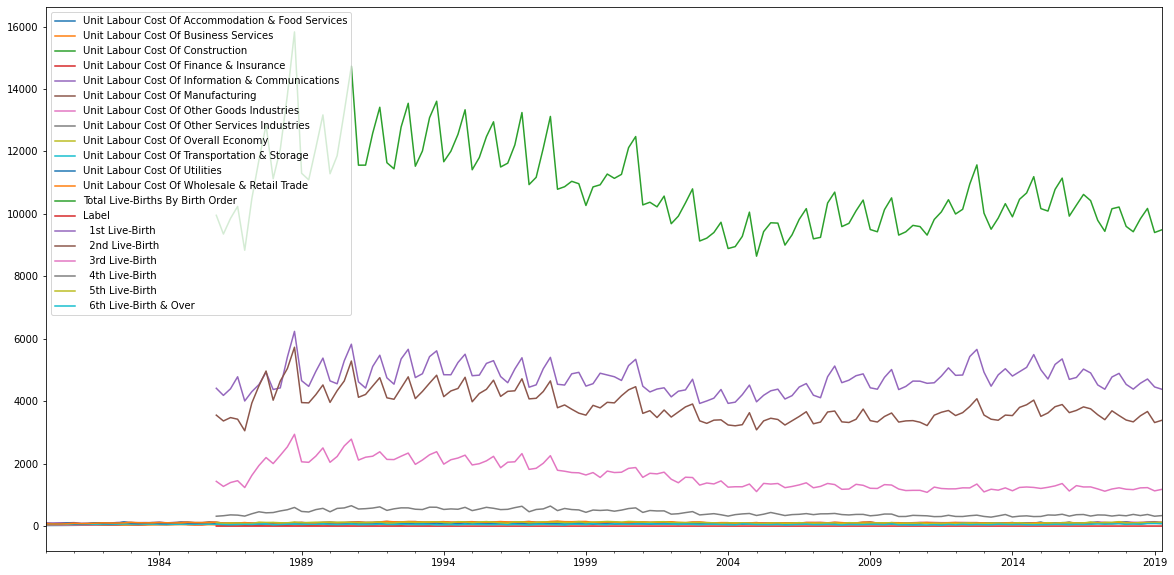

In [73]:
final_df.index = pd.DatetimeIndex(quarterly)
final_df.plot(figsize=(20,10))

In [74]:
final_df= final_df.drop('year',1)
final_df = final_df.drop('quarter',1)
final_df = final_df.drop('Quarter',1)
final_df = final_df.drop('Label',1)
final_df

/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/2435710541.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df= final_df.drop('year',1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/2435710541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('quarter',1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/2435710541.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('Quarter',1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/2435710541.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('Labe

,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,Total Live-Births By Birth Order,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over
1980-03-31,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-30,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-31,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-03-31,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-30,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,9427,4387,3338,1168,374,94,66
2018-09-30,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,9841,4574,3532,1224,337,116,58
2018-12-31,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,10173,4711,3670,1232,372,109,79
2019-03-31,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,9402,4456,3316,1128,316,105,81


In [75]:
num = 6 # test the final 6 time steps
df_train, df_test = final_df[0:-num], final_df[-num:]

In [76]:
#granger’s causality test
from statsmodels.tsa.stattools import grangercausalitytests
datatest = final_df.pct_change().dropna()
#Performing test on for labour uni and birth rate.
#gc_res = grangercausalitytests(datatest, 12)

In [77]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(datatest, variables = datatest.columns) 

,Unit Labour Cost Of Accommodation & Food Services_x,Unit Labour Cost Of Business Services_x,Unit Labour Cost Of Construction_x,Unit Labour Cost Of Finance & Insurance_x,Unit Labour Cost Of Information & Communications_x,Unit Labour Cost Of Manufacturing_x,Unit Labour Cost Of Other Goods Industries_x,Unit Labour Cost Of Other Services Industries_x,Unit Labour Cost Of Overall Economy_x,Unit Labour Cost Of Transportation & Storage_x,Unit Labour Cost Of Utilities_x,Unit Labour Cost Of Wholesale & Retail Trade_x,Total Live-Births By Birth Order_x,1st Live-Birth_x,2nd Live-Birth_x,3rd Live-Birth_x,4th Live-Birth_x,5th Live-Birth_x,6th Live-Birth & Over_x
Unit Labour Cost Of Accommodation & Food Services_y,1.0000,0.0000,0.0043,0.0149,0.0066,0.0000,0.0003,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,0.0116,0.0171,0.0592
Unit Labour Cost Of Business Services_y,0.0000,1.0000,0.0000,0.0000,0.0001,0.0000,0.0008,0.0000,0.0026,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0407
Unit Labour Cost Of Construction_y,0.0000,0.0000,1.0000,0.0001,0.0000,0.0000,0.0002,0.0000,0.0799,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0003,0.0180,0.1580,0.1605
Unit Labour Cost Of Finance & Insurance_y,0.0023,0.0003,0.0000,1.0000,0.0049,0.0000,0.0004,0.0000,0.0002,0.0015,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.1231
Unit Labour Cost Of Information & Communications_y,0.0031,0.0072,0.0008,0.0015,1.0000,0.0000,0.0247,0.0000,0.1890,0.0008,0.0000,0.0000,0.0000,0.0000,0.0007,0.0014,0.0002,0.0003,0.0005
Unit Labour Cost Of Manufacturing_y,0.0004,0.0000,0.0000,0.0376,0.0001,1.0000,0.0013,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060,0.0321
Unit Labour Cost Of Other Goods Industries_y,0.0000,0.0001,0.0000,0.0269,0.0052,0.0000,1.0000,0.0004,0.4872,0.0001,0.0012,0.0000,0.0000,0.0000,0.0000,0.0001,0.0018,0.0032,0.1020
Unit Labour Cost Of Other Services Industries_y,0.0000,0.0000,0.0000,0.0014,0.0000,0.0000,0.0003,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0104
Unit Labour Cost Of Overall Economy_y,0.0316,0.0207,0.0776,0.1669,0.3703,0.0060,0.0061,0.0054,1.0000,0.0293,0.1916,0.1075,0.0000,0.0002,0.0000,0.0009,0.0174,0.2386,0.0718
Unit Labour Cost Of Transportation & Storage_y,0.0000,0.0007,0.0000,0.0276,0.0805,0.0000,0.0669,0.0002,0.0000,1.0000,0.0089,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0008,0.0008


In [78]:
#first adf test
df_train = df_train.diff().dropna()

In [79]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [80]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Accommodation & Food Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4879
 No. Lags Chosen       = 10
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Business Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.734
 No. Lags Chosen       = 3
 Critical value 1%     = -3.485
 Critical value 5%     = -2.885
 Critical value 10%    = -2.579
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Construction" 
    ---------------------

In [81]:
#second adf test
df_train = df_train.diff().dropna()

In [82]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Accommodation & Food Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5093
 No. Lags Chosen       = 8
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Business Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1503
 No. Lags Chosen       = 6
 Critical value 1%     = -3.487
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Construction" 
    ----------------------------

In [83]:
#all datasets are now stationary
df_train

,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,Total Live-Births By Birth Order,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over
1986-09-30,1.9,1.1,20.7,9.4,-0.1,28.9,8.2,3.0,4.1,8.2,12.0,27.1,1102,440,294,286,11,27,5
1986-12-31,3.5,-1.6,-5.7,14.5,6.2,16.1,6.3,11.0,-0.5,5.2,23.2,3.4,-116,172,-160,-65,-35,-11,13
1987-03-31,-2.2,-1.7,1.5,-32.2,-13.2,-14.6,-0.8,-23.2,0.7,-2.3,-42.4,12.9,-1790,-1159,-318,-279,-23,-17,-2
1987-06-30,-1.4,6.3,-15.6,12.3,3.9,-11.6,-7.8,14.5,2.1,-3.6,16.5,-38.0,3059,1074,1259,609,106,18,-10
1987-09-30,-2.3,-4.3,8.0,2.2,-4.8,12.5,-0.6,-2.4,-4.7,-4.0,0.3,19.1,-418,-73,-339,-72,-12,43,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31,16.6,13.3,10.0,2.1,15.5,9.3,-0.8,-3.1,-1.2,13.6,8.2,15.6,-542,-391,-175,45,-55,21,13
2017-03-31,-10.2,-10.1,-12.4,3.3,-7.9,-6.8,18.2,12.4,1.9,-16.5,4.6,-0.8,-433,-261,-128,-67,84,-61,0
2017-06-30,-10.9,-11.5,-11.4,-7.0,-5.6,-17.5,-33.5,-36.8,0.2,-5.0,-34.5,-23.4,278,246,32,-8,-39,62,-15
2017-09-30,3.6,10.0,9.6,-1.3,-3.2,7.7,-1.9,31.2,-1.9,6.9,21.1,12.9,1076,530,442,144,-27,-29,16


In [85]:
#Perform Johanson's Cointegration Test and Report Summary

#data = final_df[["Unit Labour Cost Of Overall Economy", "Total Live-Births By Birth Order"]].pct_change().dropna()
#data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction"]].pct_change().dropna()

data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction","Unit Labour Cost Of Finance & Insurance","Unit Labour Cost Of Information & Communications","Unit Labour Cost Of Manufacturing","Unit Labour Cost Of Other Goods Industries","Unit Labour Cost Of Other Services Industries","Unit Labour Cost Of Overall Economy","Unit Labour Cost Of Transportation & Storage","Unit Labour Cost Of Utilities","Unit Labour Cost Of Wholesale & Retail Trade"]].pct_change().dropna()
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data)
        

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Unit Labour Cost Of Accommodation & Food Services ::  476.69    > 311.1288  =>   True
Unit Labour Cost Of Business Services ::  377.61    > 263.2603  =>   True
Unit Labour Cost Of Construction ::  293.91    > 219.4051  =>   True
Unit Labour Cost Of Finance & Insurance ::  236.28    > 179.5199  =>   True
Unit Labour Cost Of Information & Communications ::  187.31    > 143.6691  =>   True
Unit Labour Cost Of Manufacturing ::  140.74    > 111.7797  =>   True
Unit Labour Cost Of Other Goods Industries ::  100.59    > 83.9383   =>   True
Unit Labour Cost Of Other Services Industries ::  73.11     > 60.0627   =>   True
Unit Labour Cost Of Overall Economy ::  47.76     > 40.1749   =>   True
Unit Labour Cost Of Transportation & Storage ::  29.03     > 24.2761   =>   True
Unit Labour Cost Of Utilities ::  14.16     > 12.3212   =>   True
Unit Labour Cost Of Wholesale & Retail Trade ::  2.23      > 4.1296    

In [86]:
#data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction","Unit Labour Cost Of Finance & Insurance","Unit Labour Cost Of Information & Communications","Unit Labour Cost Of Manufacturing","Unit Labour Cost Of Other Goods Industries","Unit Labour Cost Of Other Services Industries","Unit Labour Cost Of Overall Economy","Unit Labour Cost Of Transportation & Storage","Unit Labour Cost Of Utilities","Unit Labour Cost Of Wholesale & Retail Trade"]].pct_change().dropna()
data = df_train.pct_change().dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
var = VAR(data)


/Users/jun/.virtualenvs/data-sci/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


In [87]:
np.isinf(data).any()

Unit Labour Cost Of Accommodation & Food Services    False
Unit Labour Cost Of Business Services                False
Unit Labour Cost Of Construction                     False
Unit Labour Cost Of Finance & Insurance              False
Unit Labour Cost Of Information & Communications     False
Unit Labour Cost Of Manufacturing                    False
Unit Labour Cost Of Other Goods Industries           False
Unit Labour Cost Of Other Services Industries        False
Unit Labour Cost Of Transportation & Storage         False
Unit Labour Cost Of Utilities                        False
Unit Labour Cost Of Wholesale & Retail Trade         False
Total Live-Births By Birth Order                     False
  1st Live-Birth                                     False
  2nd Live-Birth                                     False
  3rd Live-Birth                                     False
  4th Live-Birth                                     False
dtype: bool

In [88]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = var.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  192.12193174366178
BIC :  198.3083558230535
FPE :  2.815582438793794e+83
HQIC:  194.63500266540856 

Lag Order = 2
AIC :  191.96733937049024
BIC :  204.03915513989378
FPE :  2.909997403847137e+83
HQIC:  196.87088059871053 

Lag Order = 3
AIC :  193.70976127930166
BIC :  211.7290440585711
FPE :  2.88469823646435e+84
HQIC:  201.02863628493407 

Lag Order = 4
AIC :  190.43029616658356
BIC :  214.4602314345225
FPE :  3.788501396855131e+83
HQIC:  200.18976899340967 

Lag Order = 5
AIC :  190.80149454064252
BIC :  220.90640536268862
FPE :  7.540126205528682e+84
HQIC:  203.02723774345878 

Lag Order = 6
AIC :  183.7405100207399
BIC :  219.98588532585833
FPE :  2.197024324452588e+84
HQIC:  198.45861275003716 

Lag Order = 7
AIC :  168.22593649697586
BIC :  210.6784602345515
FPE :  2.428387537499508e+86
HQIC:  185.46291272936736 

Lag Order = 8
AIC :  138.77163696129065
BIC :  187.49921817003053
FPE :  8.570729169416743e+65
HQIC:  158.55443387444737 

Lag Order = 9
AIC :  1

In [89]:
print(len(data.columns))
print(len(final_df.columns))
print(data.columns)
print(final_df.columns)


16
19
Index(['Unit Labour Cost Of Accommodation & Food Services',
       'Unit Labour Cost Of Business Services',
       'Unit Labour Cost Of Construction',
       'Unit Labour Cost Of Finance & Insurance',
       'Unit Labour Cost Of Information & Communications',
       'Unit Labour Cost Of Manufacturing',
       'Unit Labour Cost Of Other Goods Industries',
       'Unit Labour Cost Of Other Services Industries',
       'Unit Labour Cost Of Transportation & Storage',
       'Unit Labour Cost Of Utilities',
       'Unit Labour Cost Of Wholesale & Retail Trade',
       'Total Live-Births By Birth Order', '  1st Live-Birth',
       '  2nd Live-Birth', '  3rd Live-Birth', '  4th Live-Birth'],
      dtype='object')
Index(['Unit Labour Cost Of Accommodation & Food Services',
       'Unit Labour Cost Of Business Services',
       'Unit Labour Cost Of Construction',
       'Unit Labour Cost Of Finance & Insurance',
       'Unit Labour Cost Of Information & Communications',
       'Unit Labou

In [90]:
new_df_train = df_train.drop('  5th Live-Birth', 1)
new_df_train = new_df_train.drop('  6th Live-Birth & Over', 1)
new_df_train = new_df_train.drop('Unit Labour Cost Of Overall Economy', 1)

print(len(new_df_train.columns))
print(len(data.columns))

16
16


/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/3492989558.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_train = df_train.drop('  5th Live-Birth', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/3492989558.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_train = new_df_train.drop('  6th Live-Birth & Over', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/3492989558.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_train = new_df_train.drop('Unit Labour Cost Of Overall Economy', 1)


In [91]:
new_df_test = df_test.drop('  5th Live-Birth', 1)
new_df_test = new_df_test.drop('  6th Live-Birth & Over', 1)
new_df_test = new_df_test.drop('Unit Labour Cost Of Overall Economy', 1)

new_final_df = final_df.drop('  5th Live-Birth', 1)
new_final_df = new_final_df.drop('  6th Live-Birth & Over', 1)
new_final_df = new_final_df.drop('Unit Labour Cost Of Overall Economy', 1)

/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/2727175368.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_test = df_test.drop('  5th Live-Birth', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/2727175368.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_test = new_df_test.drop('  6th Live-Birth & Over', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/2727175368.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_test = new_df_test.drop('Unit Labour Cost Of Overall Economy', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_79551/2727175368.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for t

In [92]:
x= var.select_order(maxlags=6)
x.summary()

,AIC,BIC,FPE,HQIC
0,189.5,189.9*,1.947e+82*,189.6*
1,192.2,198.5,3.035e+83,194.8
2,192.0,204.3,2.993e+83,197.0
3,193.6,211.9,2.800e+84,201.1
4,190.1,214.4,3.151e+83,200.0
5,190.6,220.9,7.244e+84,202.9
6,183.7*,220.0,2.197e+84,198.5


In [93]:
results = var.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 03, Dec, 2021
Time:                     11:18:05
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                    219.986
Nobs:                     119.000    HQIC:                   198.459
Log likelihood:          -12082.2    FPE:                2.19702e+84
AIC:                      183.741    Det(Omega_mle):     1.58244e+80
--------------------------------------------------------------------
Results for equation Unit Labour Cost Of Accommodation & Food Services
                                                          coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------
const                                                        0.480306         3.663966            0.

In [94]:
lag_order = results.k_ar
forecast_input = new_df_train.values[-lag_order:]
forecast_input.shape

(6, 16)

In [95]:
#forecast values
num = 6
fc = results.forecast(y=forecast_input, steps=num)
df_forecast = pd.DataFrame(fc, index=final_df.index[-num:], columns=new_final_df.columns + '_forecast')
df_forecast 

,Unit Labour Cost Of Accommodation & Food Services_forecast,Unit Labour Cost Of Business Services_forecast,Unit Labour Cost Of Construction_forecast,Unit Labour Cost Of Finance & Insurance_forecast,Unit Labour Cost Of Information & Communications_forecast,Unit Labour Cost Of Manufacturing_forecast,Unit Labour Cost Of Other Goods Industries_forecast,Unit Labour Cost Of Other Services Industries_forecast,Unit Labour Cost Of Transportation & Storage_forecast,Unit Labour Cost Of Utilities_forecast,Unit Labour Cost Of Wholesale & Retail Trade_forecast,Total Live-Births By Birth Order_forecast,1st Live-Birth_forecast,2nd Live-Birth_forecast,3rd Live-Birth_forecast,4th Live-Birth_forecast
2018-03-31,89.842599,-32.416789,191.254874,-182.086393,-1.947441e+15,-10.828386,113.450296,-163.928838,-22.084405,-156.071492,-2.365286e+15,80.468274,-482.518272,208.034225,11.005671,-140.402691
2018-06-30,-64.396998,0.451777,-242.006078,-13.726856,8.517914e+14,71.911755,-54.159251,-99.387542,123.147379,490.194178,-6.950833e+14,219.559440,-426.721920,-416.726542,76.242511,-205.755307
2018-09-30,-85.314174,51.146579,-166.059248,-59.903645,3.270355e+15,69.744867,80.259987,94.668690,-302.981520,130.404231,-2.743713e+14,203.403417,121.099066,694.599136,-109.625749,251.440802
2018-12-31,121.712906,29.086524,-5.024383,-111.748196,1.010579e+15,30.549292,49.859501,180.416213,-12.136999,-205.334778,9.032175e+14,114.447280,137.694709,-661.389155,78.611898,37.250863
2019-03-31,87.337448,6.586180,88.589425,178.807390,-1.537359e+15,-69.575937,-114.563894,-45.374886,47.146698,-306.262586,-1.541279e+15,34.872019,-201.056183,-26.454225,-24.224243,-180.007876
2019-06-30,10.832213,9.445051,11.711008,296.755307,-6.086974e+14,18.597642,-64.169388,248.368341,163.425594,227.995306,1.531059e+15,-105.442436,-98.758970,850.623684,197.418872,105.293498


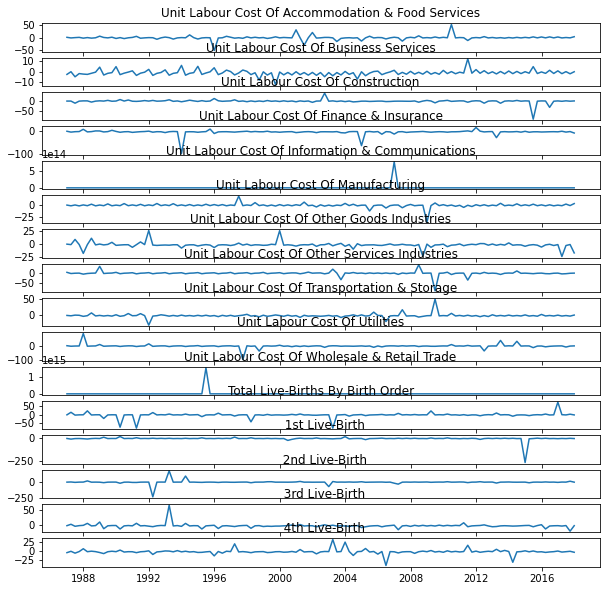

In [96]:
results.plot();

In [ ]:
results.plot_acorr()

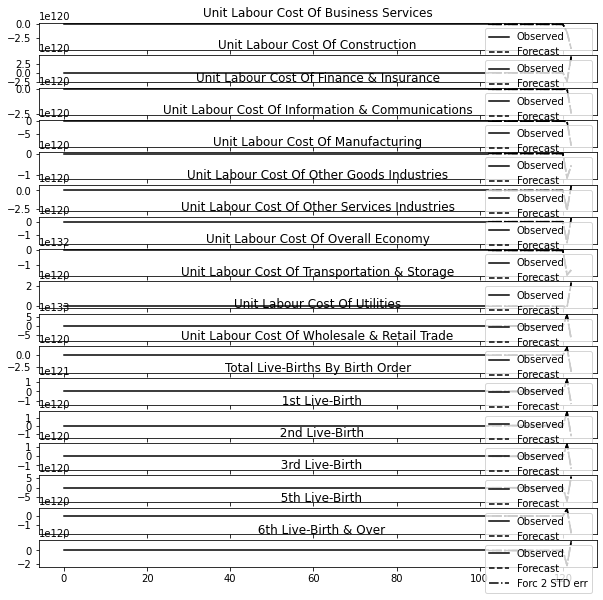

In [163]:
plt = results.plot_forecast(20)


In [89]:
fevd = results.fevd(5)

fevd.summary()

FEVD for Unit Labour Cost Of Accommodation & Food Services
     Unit Labour Cost Of Accommodation & Food Services  Unit Labour Cost Of Business Services  Unit Labour Cost Of Construction  Unit Labour Cost Of Finance & Insurance  Unit Labour Cost Of Information & Communications  Unit Labour Cost Of Manufacturing  Unit Labour Cost Of Other Goods Industries  Unit Labour Cost Of Other Services Industries  Unit Labour Cost Of Transportation & Storage  Unit Labour Cost Of Utilities  Unit Labour Cost Of Wholesale & Retail Trade  Total Live-Births By Birth Order    1st Live-Birth    2nd Live-Birth    3rd Live-Birth    4th Live-Birth
0                                             1.000000                               0.000000                          0.000000                                 0.000000                                          0.000000                           0.000000                                    0.000000                                       0.000000                       

In [ ]:
results.fevd(20).plot()

In [97]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_forecast'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_forecast'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_forecast'].cumsum()
    return df_fc

df_results = invert_transformation(new_df_train, df_forecast, second_diff=False) 

In [98]:
df_results

,Unit Labour Cost Of Accommodation & Food Services_forecast,Unit Labour Cost Of Business Services_forecast,Unit Labour Cost Of Construction_forecast,Unit Labour Cost Of Finance & Insurance_forecast,Unit Labour Cost Of Information & Communications_forecast,Unit Labour Cost Of Manufacturing_forecast,Unit Labour Cost Of Other Goods Industries_forecast,Unit Labour Cost Of Other Services Industries_forecast,Unit Labour Cost Of Transportation & Storage_forecast,Unit Labour Cost Of Utilities_forecast,Unit Labour Cost Of Wholesale & Retail Trade_forecast,Total Live-Births By Birth Order_forecast,1st Live-Birth_forecast,2nd Live-Birth_forecast,3rd Live-Birth_forecast,4th Live-Birth_forecast
2018-03-31,105.242599,-21.916789,195.154874,-173.986393,-1.947441e+15,16.871614,143.750296,-168.628838,-9.884405,-143.571492,-2.365286e+15,-586.531726,-758.518272,-227.965775,-21.994329,-83.402691
2018-06-30,40.845601,-21.465012,-46.851204,-187.713248,-1.095650e+15,88.783369,89.591045,-268.016380,113.262974,346.622685,-3.060370e+15,-366.972286,-1185.240192,-644.692317,54.248182,-289.157998
2018-09-30,-44.468572,29.681568,-212.910453,-247.616893,2.174706e+15,158.528236,169.851032,-173.347690,-189.718546,477.026916,-3.334741e+15,-163.568870,-1064.141126,49.906819,-55.377566,-37.717196
2018-12-31,77.244334,58.768092,-217.934836,-359.365089,3.185285e+15,189.077528,219.710532,7.068523,-201.855545,271.692138,-2.431523e+15,-49.121590,-926.446417,-611.482336,23.234332,-0.466333
2019-03-31,164.581782,65.354272,-129.345411,-180.557699,1.647926e+15,119.501591,105.146638,-38.306364,-154.708847,-34.570449,-3.972802e+15,-14.249572,-1127.502600,-637.936561,-0.989911,-180.474209
2019-06-30,175.413995,74.799323,-117.634403,116.197608,1.039228e+15,138.099233,40.977251,210.061977,8.716747,193.424857,-2.441743e+15,-119.692008,-1226.261570,212.687123,196.428960,-75.180711


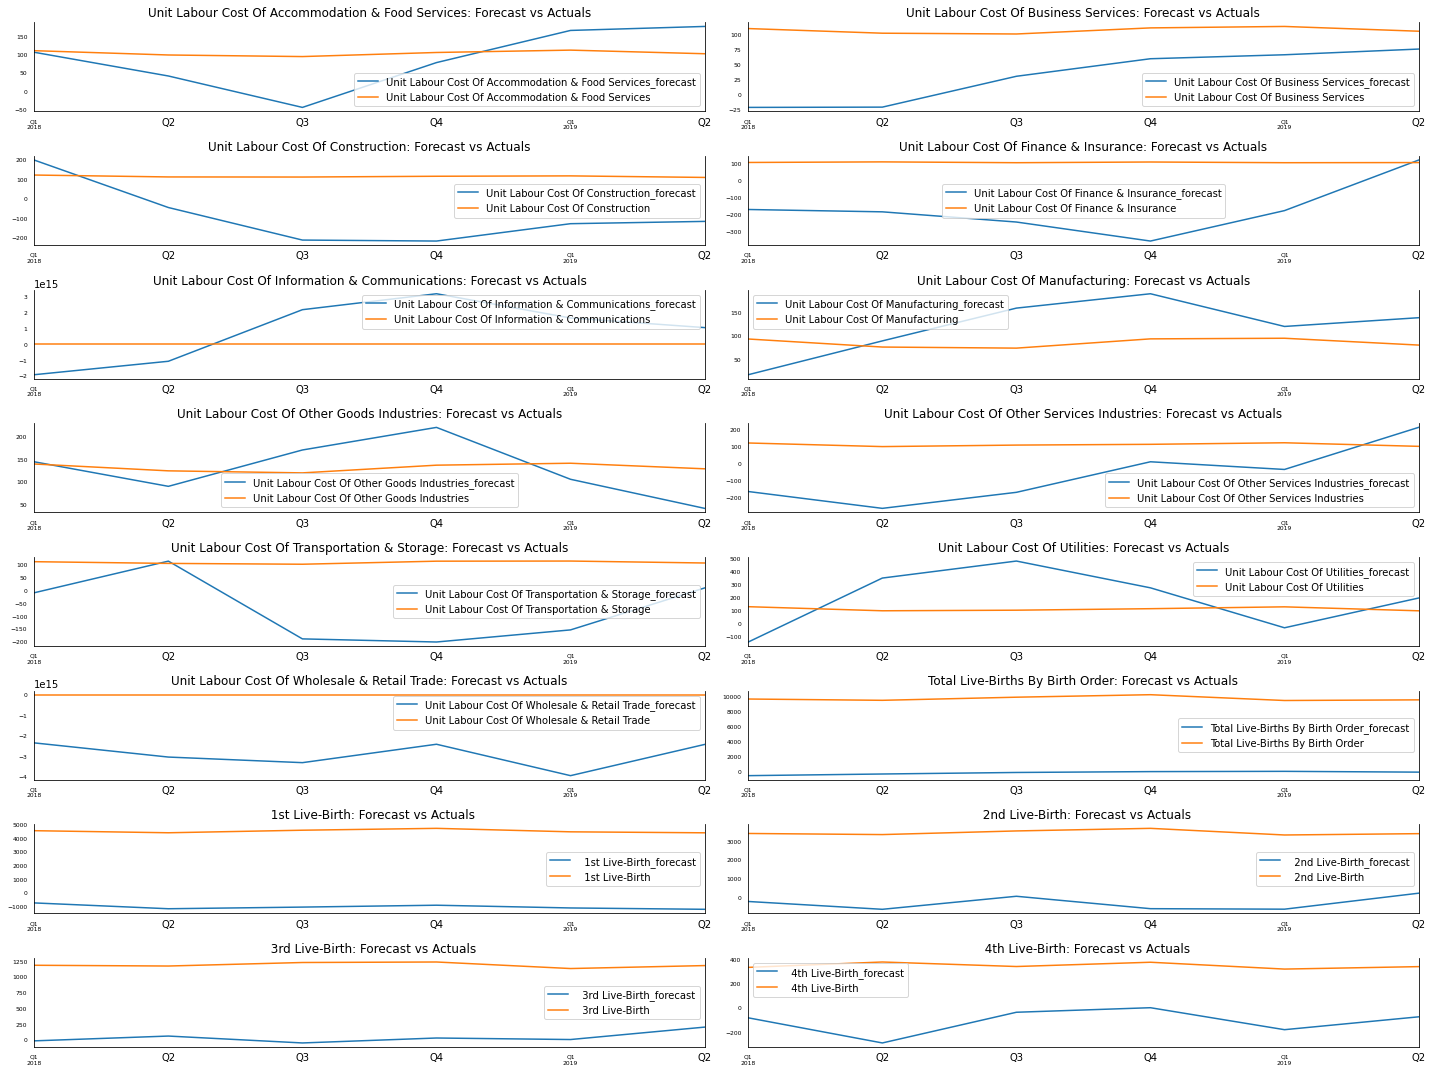

In [99]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=int(len(new_final_df.columns)/2), ncols=2, figsize=(20,15))
for i, (col,ax) in enumerate(zip(new_final_df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    new_df_test[col][-num:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


In [103]:
from statsmodels.tools.eval_measures import rmse

def adjust(val, length= 6): return str(val).ljust(length)

def forecast_accuracy(forecast, actual):
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'me':me, 'mae': mae, 'rmse': rmse})

print('Forecast Accuracy of: Total Live Births')
accuracy_prod = forecast_accuracy(df_results['Total Live-Births By Birth Order_forecast'], df_test['Total Live-Births By Birth Order'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('Forecast Accuracy of: Unit Labour Cost Of Accommodation & Food Services')
accuracy_prod = forecast_accuracy(df_results['Unit Labour Cost Of Accommodation & Food Services_forecast'].values, df_test['Unit Labour Cost Of Accommodation & Food Services'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('Forecast Accuracy of: Unit Labour Cost Of Manufacturing')
accuracy_prod = forecast_accuracy(df_results['Unit Labour Cost Of Manufacturing_forecast'].values, df_test['Unit Labour Cost Of Manufacturing'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total Live Births
me     :  -9871.356
mae    :  9871.356
rmse   :  9875.7619
Forecast Accuracy of: Unit Labour Cost Of Accommodation & Food Services
me     :  -16.5567
mae    :  59.0886
rmse   :  72.3926
Forecast Accuracy of: Unit Labour Cost Of Manufacturing
me     :  33.5936
mae    :  58.9031
rmse   :  66.3476


In [110]:
import torch

def relative(data):
    return torch.Tensor((data-data.min(axis=0))/(data.max(axis=0)-data.min(axis=0)+ 1e-9)), data.max(axis=0), data.min(axis=0)

y_test, y_test_max , y_test_min = relative(df_test['Total Live-Births By Birth Order'])

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# mean_squared_error(df_test['Total Live-Births By Birth Order'], df_results['Total Live-Births By Birth Order_forecast'])

# zxc = (df_results['Total Live-Births By Birth Order_forecast'] - y_test_min)/(y_test_max-y_test_min+ 1e-9)
# df_test['Total Live-Births By Birth Order']
# (df_test['Total Live-Births By Birth Order'] - y_test_min)/(y_test_max-y_test_min+ 1e-9)


mse = mean_squared_error((df_test['Total Live-Births By Birth Order'] - y_test_min)/(y_test_max-y_test_min+ 1e-9), (df_results['Total Live-Births By Birth Order_forecast'] - y_test_min)/(y_test_max-y_test_min+ 1e-9))
mae = mean_absolute_error((df_test['Total Live-Births By Birth Order'] - y_test_min)/(y_test_max-y_test_min+ 1e-9), (df_results['Total Live-Births By Birth Order_forecast'] - y_test_min)/(y_test_max-y_test_min+ 1e-9))
print(mse, mae)


164.0712408881017 12.80331518630837
